# **Data Visulisation**

## Objectives

* This notebook is to evaluate Business Requirement 1: 
* - The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs

* /workspaces/mildew-detection/inputs/datasets/cherry-leaves/cherry-leaves/test
* /workspaces/mildew-detection/inputs/datasets/cherry-leaves/cherry-leaves/train
* /workspaces/mildew-detection/inputs/datasets/cherry-leaves/cherry-leaves/validation

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("dark")
from matplotlib.image import imread

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection'

## Set Input Directories ##

Set the Train, Validation and Test Sets

In [7]:
my_data_dir = '/workspaces/mildew-detection/inputs/datasets/cherry-leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

Set the Output Directory

In [8]:
import os
version = 'version1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available, create a new version')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available, create a new version


Set the LabeL Names

In [9]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['powdery_mildew', 'healthy']


---

# Data Visualisation #

## Image Shape ##

Compute the average image size on the Train Set

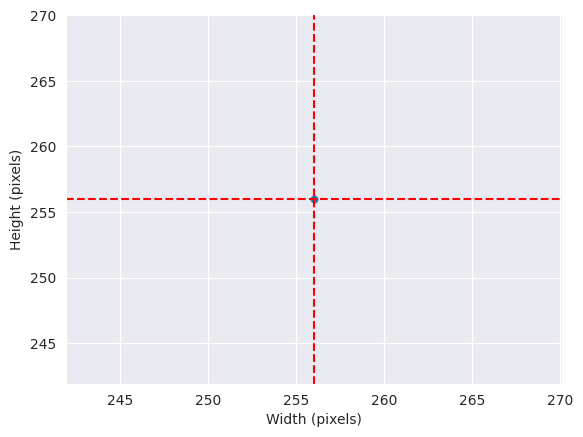

Width average: 256 
Height average: 256


In [10]:
dim1, dim2 = [],[]
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colours = img.shape
        dim1.append(d1)
        dim2.append(d2)

sns.set_style('darkgrid')
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

The average image size is all the same, however due to size constrictions I will set the average as 160 x 160

In [11]:
image_shape = (160, 160, 3)
image_shape

(160, 160, 3)

Save the image shape embeddings

In [12]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pk1")

['outputs/version1/image_shape.pk1']

---

## Average and Variability of images for each label ##

Function to load the images and calculate the mean and standard deviations

In [13]:
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), n_images_per_label=20):
    X, y = np.array([], dtype="int"), np.array([], dtype="object")
    labels= os.listdir(my_data_dir)
    for label in labels:
        counter = 0
        for image_filename in os.listdir(my_data_dir + '/' + label):
            if counter < n_images_per_label:
                img = image.load_img(
                    my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    img_resized = image.img_to_array(img) / 255
                else:
                    img_resized = image.img_to_array(img)
                X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
                y = np.append(y, label)
                counter += 1
    return X, y

Load the image shapes, and labels in an array

In [14]:
X, y = load_image_as_array(my_data_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print(X.shape, y.shape)

(60, 160, 160, 3) (60,)


Generate a plot to illustrate the mean and variability of the images per label

In [17]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    for label_to_display in np.unique(y):
        sns.set_style("dark")
        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]
        
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis = 0)
        print(f"~ Label {label_to_display} ~")
        print(f"Image Shape: {avg_img.shape}")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img, cmap="gray")
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img, cmap="gray")
        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png",
                        bbox_inches="tight",
                        dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

~ Label healthy ~
Image Shape: (160, 160, 3)
~ Label powdery_mildew ~
Image Shape: (160, 160, 3)


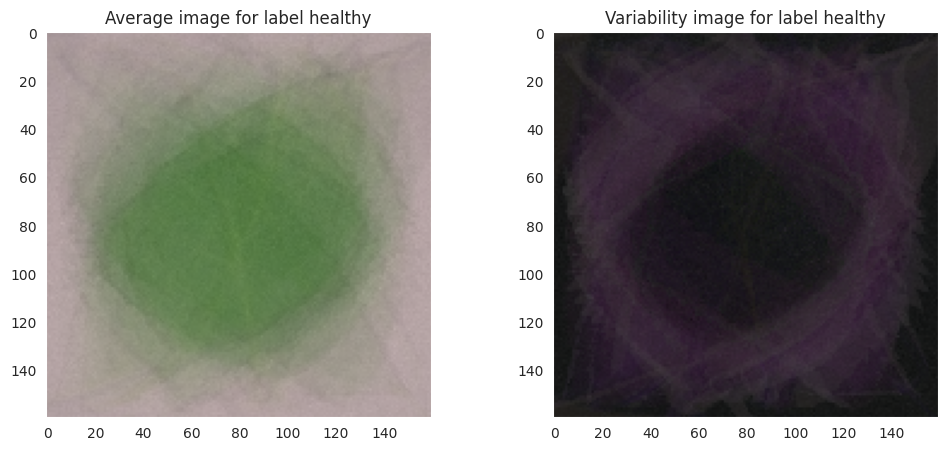

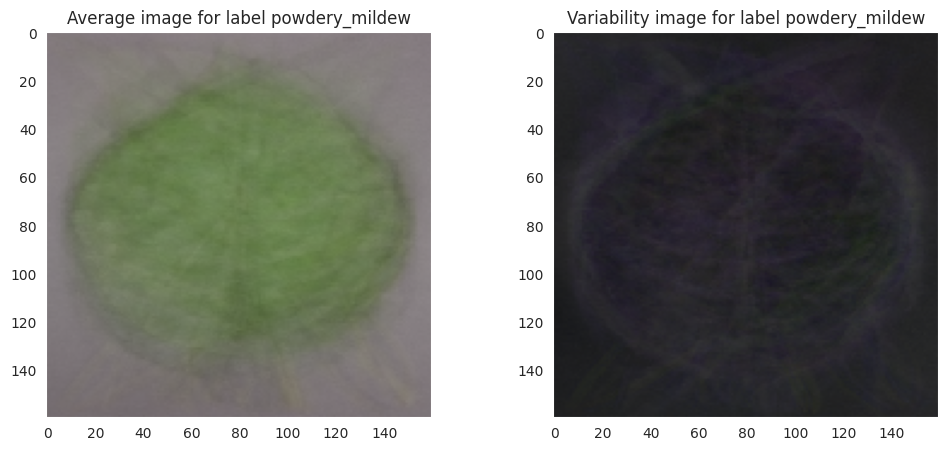

In [18]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12,5), save_image=True)

Difference between average Mildrew infected leaf, and average uninfected leave

In [20]:
def subset_image_label(X, y, label_to_display):
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2, figsize=(20, 5), save_image=False):
    sns.set_style("dark")
    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(f"Either label {label} or label {label_2} are not in {np.unique}")
        return
    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)
    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label,axis=0)
    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    axes[0].imshow(label1_avg, cmap="gray")
    axes[0].set_title(f"Average {label_1}")
    axes[1].imshow(label2_avg, cmap="gray")
    axes[1].set_title(f"Average {label_2}")
    axes[2].imshow(difference_mean, cmap="gray")
    axes[2].set_title(f"Difference image: Average {label_1} and {label_2}")
    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png",
                    bbox_inches="tight",
                    dpi=150)
    else:
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


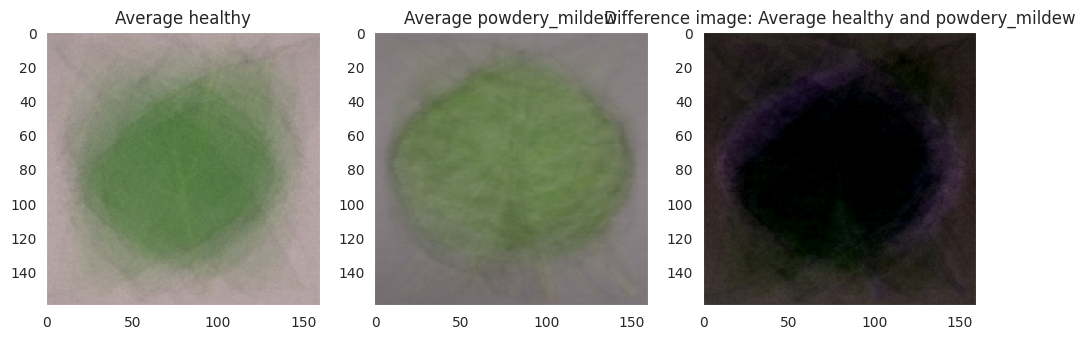

In [26]:
diff_bet_avg_image_labels_data_as_array(X=X,
                                        y=y,
                                        label_1="healthy",
                                        label_2="powdery_mildew",
                                        figsize=(12,10),
                                        save_image=True)

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
